In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import time

In [2]:
def GraphToFile(G, filename):
    nx.Graph(G)
    saveFile = open(filename, 'w')
    txt = 'graph Prim_1 {'
    saveFile.write(txt)
    try:
        [saveFile.write('\n' + u + '--' + v + ' [Label = "' + str(G[u][v]['weight']) + '"];') for u, v, d in
     G.edges(data=True)]
    except:
        [saveFile.write('\n' + str(u) + '--' + str(v) + ';') for u, v, d in
     G.edges(data=True)]
    #[print(u,v) for u, v, d in G.edges(data=True)]
    saveFile.write('\n }')
    saveFile.close()

In [3]:
def SerieToNet(serie):
    G=nx.Graph()
    for i in range(len(serie)):
        G.add_node(str(i), y=serie[i])

    for N0 in G.nodes():
        if int(N0)+1<len(G.nodes()):
            G.add_edge(N0,str(int(N0)+1))  
            
    for N0 in G.nodes():
        if int(N0)<len(G.nodes)-2:
            ya=G.node[N0]['y']
            ta=int(N0)
            for N1 in range (int(N0)+2,len(G.nodes())):
                flag=0
                yb=G.node[str(N1)]['y']
                tb=N1
                for Nc in range(int(N0)+1,int(N1)):
                    yc=G.node[str(Nc)]['y']
                    tc=Nc
                    tresh=yb + (ya-yb)*((tb-tc)/(tb-ta))
                    visible=yc<tresh

                    if visible == False:
                        flag=1
                if flag==0:
                    G.add_edge(N0,str(N1))

    return(G)

--- 1.844017744064331 seconds ---


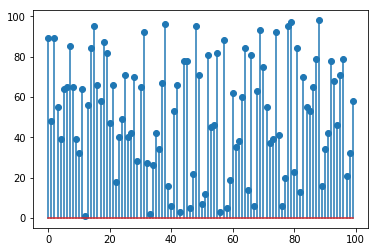

In [6]:

def main():
# s=[8,8,9,1,3,7,4,2,1,6]
    serie=np.random.randint(1,99,100)
    G1=SerieToNet(serie)
    GraphToFile(G1,'testviz3.gv')
    plt.stem(serie)
    return serie,G1

start_time = time.time()
serie,G=main()
print("--- %s seconds ---" % (time.time() - start_time))

(array([10.,  8.,  6., 10., 12.,  8., 14.,  9., 12., 11.]),
 array([ 1. , 10.7, 20.4, 30.1, 39.8, 49.5, 59.2, 68.9, 78.6, 88.3, 98. ]),
 <a list of 10 Patch objects>)

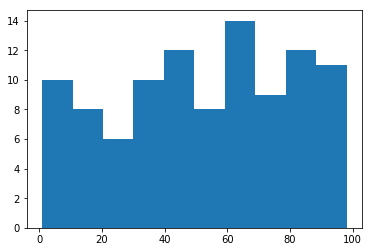

In [7]:
plt.hist(serie)
    

(array([39., 29.,  5., 13.,  3.,  6.,  1.,  2.,  1.,  1.]),
 array([ 2. ,  3.6,  5.2,  6.8,  8.4, 10. , 11.6, 13.2, 14.8, 16.4, 18. ]),
 <a list of 10 Patch objects>)

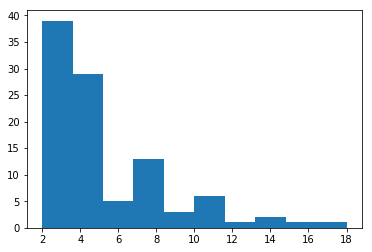

In [9]:
gradlist=[ node[1] for node in G.degree() ]
plt.hist(gradlist)